# LinearReg  Test
***
In this notebook, I'll try to use my linear regression implementation (LinearReg) over a simple 2-features dataset

First of all, we import:
1. *numpy* 
2. *matplotlib.pyplot* 
3. *pandas* 
4. *LinearReg* (personal implementation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LinearReg import LinearReg as lr

Using pandas we'll load our data:

In [2]:
data = pd.read_csv('./datasets/LinearReg.csv')

Let's see how it looks like

In [3]:
print(data.head(4))

   ID       x        y
0   0  0.0000  5.59209
1   1  0.4450  6.13800
2   2  0.6230  6.69600
3   3  1.2727  6.78900


For better insight and since the data consists of one feature only, we can plot it and see how y varies according to x, to do so, first we convert our DataFrame to a numpy array (cutting the ID column) and then plot using *pyplot*:

In [4]:
np_data = data.to_numpy()
inp = np_data[:, 1] # 2nd colunm
out = np_data[:, 2] # 3rd column
print(inp) 
print(out)

[0.       0.445    0.623    1.2727   1.78     2.225    2.67     3.115
 3.56     4.005    4.45     4.895    5.34     5.251    6.4347   6.675
 6.7284   0.       0.445    0.89     1.335    1.78     2.225    3.026
 3.115    3.56     3.649    4.45     5.2243   5.34     5.645626 6.23
 6.43826  7.12     0.       0.445    0.89     1.335    1.78     2.225
 2.67     3.115    3.56     4.005    4.45     4.895    4.8327   5.9363
 6.23     6.497    7.12    ]
[ 5.59209  6.138    6.696    6.789    7.533    7.905    8.463    8.69085
  9.3093   9.9231  10.3416  11.16    11.532   11.625   12.10116 12.834
 14.1639   5.3661   5.8311   6.2961   6.7611   7.2261   7.6911   8.1561
  8.6211   9.0861   9.5511  10.0161  10.4811  10.9461  11.4111  11.8761
 12.3411  12.8061   5.59209  6.138    6.696    6.789    7.533    7.8585
  8.463    8.69085  9.5976   9.9231  10.3416  11.16    11.532   11.625
 12.10116 12.4899  14.1639 ]


Now let's plot:

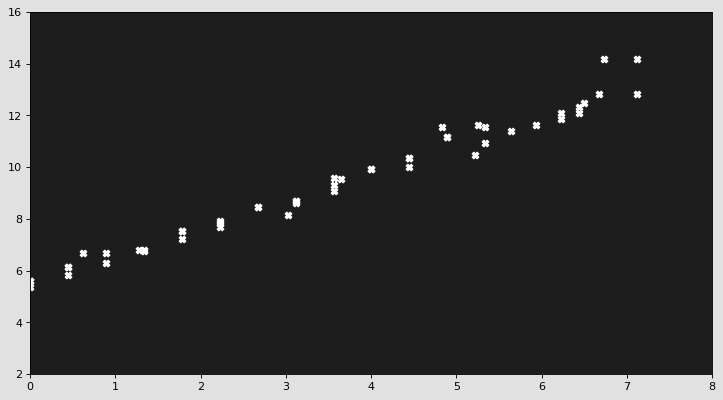

In [23]:
fig = plt.figure(figsize=(11, 6), dpi=80, facecolor='#e1e1e1')
ax = fig.add_subplot(111)
ax.set_facecolor('#1d1d1d')

ax.scatter(inp, out, marker='X', c='w')

plt.ylim((2, 16))
plt.xlim((0, 8))

plt.show()

In [6]:
X = inp.reshape(-1, 1) # make matrix
X = np.insert(X, [0], 1, axis=1) # add bias ~ 1 feature
y = out

print(X.shape)
print(X[:5, :])

(51, 2)
[[1.     0.    ]
 [1.     0.445 ]
 [1.     0.623 ]
 [1.     1.2727]
 [1.     1.78  ]]


In [19]:
model = lr().fit(X, y, verbose=1, tol=0, learning_rate=0.11, regularization_rate=0, max_iter=1000,
                batch_size = X.shape[0])
training_accuracy = model.score(X, y, tol=0.3)
print('training_accuracy = ', training_accuracy)

iteration  0  error =  42.96025663526839
iteration  1  error =  39.77319435277572
iteration  2  error =  36.82402651637168
iteration  3  error =  34.09493208256782
iteration  4  error =  31.56942866077218
iteration  5  error =  29.232271749990137
iteration  6  error =  27.069361572070676
iteration  7  error =  25.067656928120467
iteration  8  error =  23.215095548022877
iteration  9  error =  21.500520443041385
iteration  10  error =  19.913611808502022
iteration  11  error =  18.444824057765832
iteration  12  error =  17.085327600333002
iteration  13  error =  15.826955006160683
iteration  14  error =  14.66215122530588
iteration  15  error =  13.583927556992135
iteration  16  error =  12.585819085297475
iteration  17  error =  11.661845320014013
iteration  18  error =  10.806473800969849
iteration  19  error =  10.014586442351163
iteration  20  error =  9.28144841043221
iteration  21  error =  8.602679343715511
iteration  22  error =  7.974226738900905
iteration  23  error =  7.39234

iteration  320  error =  0.06384402110195696
iteration  321  error =  0.06384401955311962
iteration  322  error =  0.06384401809241771
iteration  323  error =  0.06384401671482355
iteration  324  error =  0.06384401541559721
iteration  325  error =  0.06384401419027007
iteration  326  error =  0.06384401303462905
iteration  327  error =  0.0638440119447019
iteration  328  error =  0.06384401091674356
iteration  329  error =  0.06384400994722314
iteration  330  error =  0.06384400903281129
iteration  331  error =  0.06384400817036914
iteration  332  error =  0.06384400735693677
iteration  333  error =  0.06384400658972356
iteration  334  error =  0.06384400586609809
iteration  335  error =  0.0638440051835792
iteration  336  error =  0.06384400453982737
iteration  337  error =  0.06384400393263656
iteration  338  error =  0.06384400335992631
iteration  339  error =  0.0638440028197353
iteration  340  error =  0.06384400231021368
iteration  341  error =  0.06384400182961719
iteration  34

iteration  594  error =  0.06384399383296666
iteration  595  error =  0.0638439938329665
iteration  596  error =  0.06384399383296632
iteration  597  error =  0.06384399383296613
iteration  598  error =  0.06384399383296602
iteration  599  error =  0.06384399383296584
iteration  600  error =  0.06384399383296573
iteration  601  error =  0.06384399383296559
iteration  602  error =  0.06384399383296548
iteration  603  error =  0.06384399383296538
iteration  604  error =  0.06384399383296524
iteration  605  error =  0.06384399383296517
iteration  606  error =  0.06384399383296507
iteration  607  error =  0.06384399383296491
iteration  608  error =  0.06384399383296487
iteration  609  error =  0.06384399383296481
iteration  610  error =  0.0638439938329647
iteration  611  error =  0.06384399383296467
iteration  612  error =  0.06384399383296457
iteration  613  error =  0.06384399383296449
iteration  614  error =  0.06384399383296444
iteration  615  error =  0.06384399383296434
iteration  6

In [21]:
x_range = np.arange(0, 8, 0.1)
x_featured = np.insert(x_range.reshape(-1, 1), [0], 1, axis=1)
y_range = model.predict(x_featured)

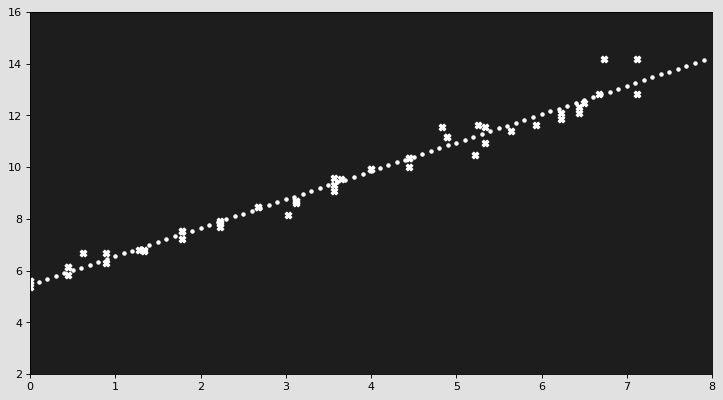

In [24]:
fig = plt.figure(figsize=(11, 6), dpi=80, facecolor='#e1e1e1')
ax = fig.add_subplot(111)
ax.set_facecolor('#1d1d1d')

ax.scatter(inp, out, marker='X', c='w')
ax.scatter(x_range, y_range, marker='.', c='w')

plt.ylim((2, 16))
plt.xlim((0, 8))

plt.show()